In [1]:
import pandas as pd
import os
import csv
import glob
#import numpy as np
import math
#data visualizations
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline


#score metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_docs').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression

In [3]:
c1 = pd.read_csv("ALF_1.csv")

In [4]:
c2 = pd.read_csv("ALF_2.csv")

In [5]:
c1.shape


(551, 30)

In [6]:
c2.shape

(8234, 30)

In [7]:
reader = csv.reader(open("ALF_1.csv"))
reader1 = csv.reader(open("ALF_2.csv"))
f = open("combined.csv", "w")
writer = csv.writer(f)
i = 0
for row in reader:
    writer.writerow(row)
for row in reader1:
    i+=1
    if i > 1:
        writer.writerow(row)
f.close()
acute_liver_failure_data = pd.read_csv("combined.csv")

In [8]:
acute_liver_failure_data.shape

(8785, 30)

In [9]:
acute_liver_failure_data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,68,M,south,78.9,161.9,30.10,1.0,104.2,150.0,83.0,...,0.0,0,1.0,1,0.0,1,0.0,0.0,0.0,NaN
1,74,F,east,116.7,186.0,33.73,1.0,123.4,145.0,80.0,...,0.0,1,1.0,0,0.0,0,0.0,0.0,0.0,NaN
2,82,F,east,75.4,176.0,24.34,0.0,98.2,146.0,28.0,...,0.0,1,1.0,0,0.0,1,0.0,0.0,0.0,NaN
3,56,M,east,66.8,159.9,26.13,0.0,85.7,98.0,72.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,NaN
4,43,M,east,82.5,165.5,30.12,1.0,97.2,128.0,95.0,...,0.0,0,1.0,1,0.0,0,0.0,0.0,0.0,NaN


In [10]:
acute_liver_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
Age                       8785 non-null int64
Gender                    8785 non-null object
Region                    8785 non-null object
Weight                    8591 non-null float64
Height                    8594 non-null float64
Body Mass Index           8495 non-null float64
Obesity                   8495 non-null float64
Waist                     8471 non-null float64
Maximum Blood Pressure    8481 non-null float64
Minimum Blood Pressure    8409 non-null float64
Good Cholesterol          8768 non-null float64
Bad Cholesterol           8767 non-null float64
Total Cholesterol         8769 non-null float64
Dyslipidemia              8785 non-null int64
PVD                       8785 non-null int64
Physical Activity         8775 non-null float64
Education                 8765 non-null float64
Unmarried                 8333 non-null float64
Income                    7624 non-nu

In [11]:
acute_liver_failure_data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [12]:
acute_liver_failure_data['Region'].unique()

array(['south', 'east', 'west', 'north'], dtype=object)

In [13]:
acute_liver_failure_data['SourceofCare'].unique()

array(['PrivateHospital', 'clinic', nan, 'GovernamentHospital',
       'NeverCounsulted'], dtype=object)

In [14]:
acute_liver_failure_data['Gender'] = acute_liver_failure_data['Gender'].astype('category')
acute_liver_failure_data['Region'] = acute_liver_failure_data['Region'].astype('category')
acute_liver_failure_data['SourceofCare'] = acute_liver_failure_data['SourceofCare'].astype('category')

In [15]:
acute_liver_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
Age                       8785 non-null int64
Gender                    8785 non-null category
Region                    8785 non-null category
Weight                    8591 non-null float64
Height                    8594 non-null float64
Body Mass Index           8495 non-null float64
Obesity                   8495 non-null float64
Waist                     8471 non-null float64
Maximum Blood Pressure    8481 non-null float64
Minimum Blood Pressure    8409 non-null float64
Good Cholesterol          8768 non-null float64
Bad Cholesterol           8767 non-null float64
Total Cholesterol         8769 non-null float64
Dyslipidemia              8785 non-null int64
PVD                       8785 non-null int64
Physical Activity         8775 non-null float64
Education                 8765 non-null float64
Unmarried                 8333 non-null float64
Income                    7624 no

In [16]:
acute_liver_failure_data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,68,M,south,78.9,161.9,30.10,1.0,104.2,150.0,83.0,...,0.0,0,1.0,1,0.0,1,0.0,0.0,0.0,NaN
1,74,F,east,116.7,186.0,33.73,1.0,123.4,145.0,80.0,...,0.0,1,1.0,0,0.0,0,0.0,0.0,0.0,NaN
2,82,F,east,75.4,176.0,24.34,0.0,98.2,146.0,28.0,...,0.0,1,1.0,0,0.0,1,0.0,0.0,0.0,NaN
3,56,M,east,66.8,159.9,26.13,0.0,85.7,98.0,72.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,NaN
4,43,M,east,82.5,165.5,30.12,1.0,97.2,128.0,95.0,...,0.0,0,1.0,1,0.0,0,0.0,0.0,0.0,NaN


In [17]:
total_missingvalues = acute_liver_failure_data.isnull().sum()
total_missingvalues

Age                          0
Gender                       0
Region                       0
Weight                     194
Height                     191
Body Mass Index            290
Obesity                    290
Waist                      314
Maximum Blood Pressure     304
Minimum Blood Pressure     376
Good Cholesterol            17
Bad Cholesterol             18
Total Cholesterol           16
Dyslipidemia                 0
PVD                          0
Physical Activity           10
Education                   20
Unmarried                  452
Income                    1161
SourceofCare                 3
PoorVision                 563
Alcohol Consumption          0
HyperTension                80
Family  HyperTension         0
Diabetes                     2
Family Diabetes              0
Hepatitis                   22
Family Hepatitis             6
Chronic Fatigue             35
ALF                       2785
dtype: int64

In [18]:
#remove when ALF is null. 
acute_liver_failure_data = acute_liver_failure_data.dropna(axis = 0, subset=['ALF'])

In [19]:
acute_liver_failure_data.shape

(6000, 30)

In [20]:
total_missingvalues = acute_liver_failure_data.isnull().sum()
total_missingvalues

Age                         0
Gender                      0
Region                      0
Weight                    133
Height                    139
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure    252
Good Cholesterol            8
Bad Cholesterol             8
Total Cholesterol           6
Dyslipidemia                0
PVD                         0
Physical Activity           8
Education                  15
Unmarried                 301
Income                    792
SourceofCare                2
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

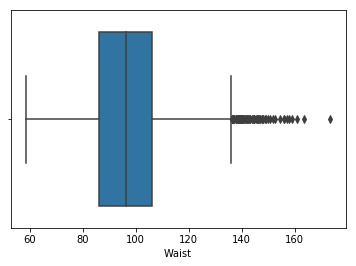

In [21]:
#Check outlier
sns.boxplot(acute_liver_failure_data['Waist'])


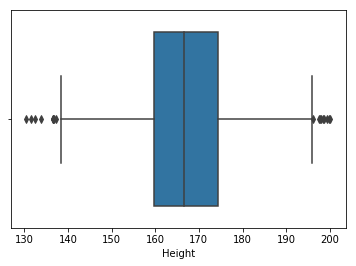

In [22]:
sns.boxplot(acute_liver_failure_data['Height'])

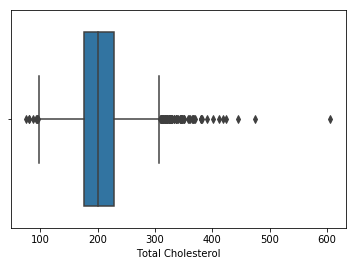

In [23]:
sns.boxplot(acute_liver_failure_data['Total Cholesterol'])


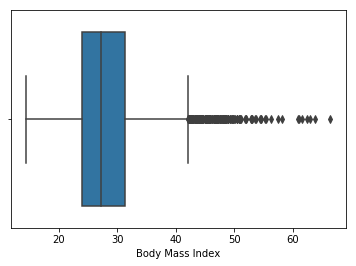

In [24]:
sns.boxplot(acute_liver_failure_data['Body Mass Index'])

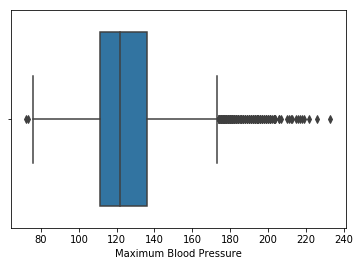

In [25]:
sns.boxplot(acute_liver_failure_data['Maximum Blood Pressure'])

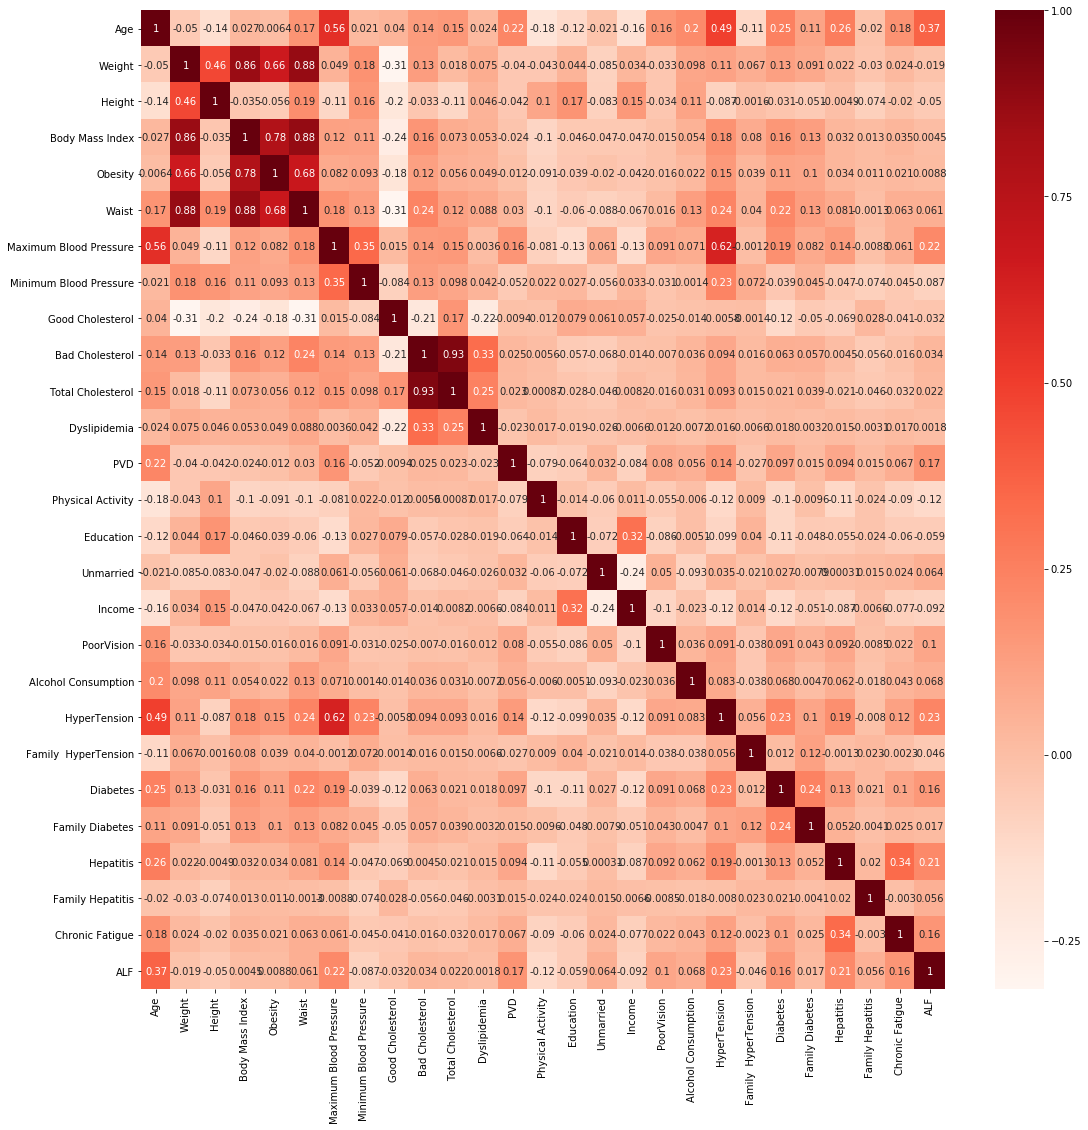

In [26]:
#Reduce the data // feature seleciton 
X = acute_liver_failure_data
Y = acute_liver_failure_data["ALF"] 

plt.figure(figsize=(18,18))
cor = acute_liver_failure_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
#Correlation with output variable
cor_target = abs(cor["ALF"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.03]
relevant_features

Age                       0.367639
Height                    0.050380
Waist                     0.060799
Maximum Blood Pressure    0.216645
Minimum Blood Pressure    0.087266
Good Cholesterol          0.031826
Bad Cholesterol           0.033539
PVD                       0.168850
Physical Activity         0.119817
Education                 0.059445
Unmarried                 0.063628
Income                    0.092472
PoorVision                0.100678
Alcohol Consumption       0.067631
HyperTension              0.232705
Family  HyperTension      0.045650
Diabetes                  0.155641
Hepatitis                 0.214971
Family Hepatitis          0.056097
Chronic Fatigue           0.162796
ALF                       1.000000
Name: ALF, dtype: float64

In [28]:
# One of the assumptions of linear regression is that the independent 
#variables need to be uncorrelated with each other.

print(acute_liver_failure_data[['Age', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'PVD', 'Physical Activity', 
         'Education', 'Income', 'PoorVision', 'HyperTension', 'Diabetes', 'Hepatitis', 'Chronic Fatigue']].corr())
#we can find that hypertension have a strong relationship with Maximum Blood Pressure

                             Age  Maximum Blood Pressure  \
Age                     1.000000                0.559924   
Maximum Blood Pressure  0.559924                1.000000   
Minimum Blood Pressure  0.021252                0.345462   
PVD                     0.224636                0.163933   
Physical Activity      -0.176430               -0.080863   
Education              -0.119532               -0.131478   
Income                 -0.157903               -0.132987   
PoorVision              0.161967                0.091087   
HyperTension            0.491920                0.623262   
Diabetes                0.246075                0.185553   
Hepatitis               0.263613                0.139120   
Chronic Fatigue         0.180345                0.061006   

                        Minimum Blood Pressure       PVD  Physical Activity  \
Age                                   0.021252  0.224636          -0.176430   
Maximum Blood Pressure                0.345462  0.163933     

In [29]:
acute_liver_failure_data = acute_liver_failure_data[['Age', 'Maximum Blood Pressure',
                            'Minimum Blood Pressure', 
        'PVD', 'Physical Activity', 'Education', 'Income', 
        'PoorVision', 'Diabetes', 'Hepatitis', 'Chronic Fatigue', 'ALF']]

In [30]:
acute_liver_failure_data.shape

(6000, 12)

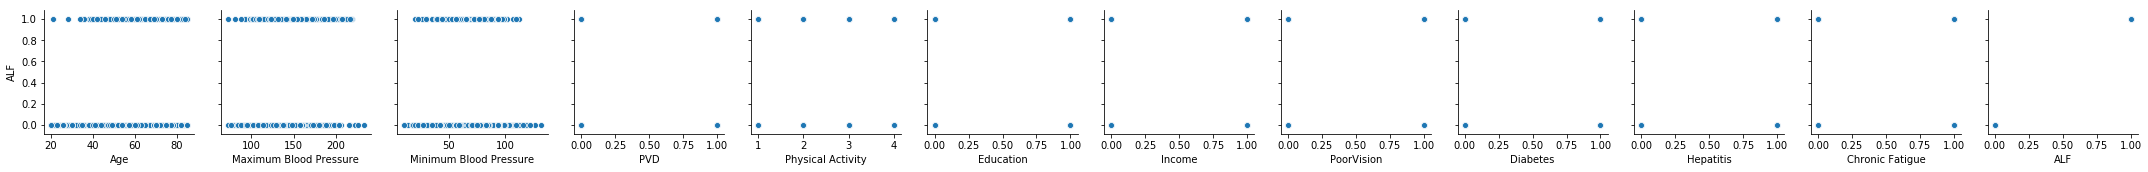

In [31]:
sns.pairplot(acute_liver_failure_data, x_vars = ['Age', 'Maximum Blood Pressure',
                            'Minimum Blood Pressure', 
        'PVD', 'Physical Activity', 'Education', 'Income', 
        'PoorVision', 'Diabetes', 'Hepatitis', 'Chronic Fatigue', 'ALF'],  y_vars = ['ALF'])

In [32]:
acute_liver_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 551 to 6550
Data columns (total 12 columns):
Age                       6000 non-null int64
Maximum Blood Pressure    5794 non-null float64
Minimum Blood Pressure    5748 non-null float64
PVD                       6000 non-null int64
Physical Activity         5992 non-null float64
Education                 5985 non-null float64
Income                    5208 non-null float64
PoorVision                5624 non-null float64
Diabetes                  5999 non-null float64
Hepatitis                 5987 non-null float64
Chronic Fatigue           5974 non-null float64
ALF                       6000 non-null float64
dtypes: float64(10), int64(2)
memory usage: 609.4 KB


In [33]:
#Taking care of missing values
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN',strategy = 'median',axis=0)
imputer = imputer.fit(acute_liver_failure_data.iloc[:,0:12]) #SELECTING THE COLUMN WITH MISSING VALUES
acute_liver_failure_data.iloc[:,0:12] = imputer.transform(acute_liver_failure_data.iloc[:,0:13])

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
acute_liver_failure_data['Physical Activity'].unique()

array([3., 1., 2., 4.])

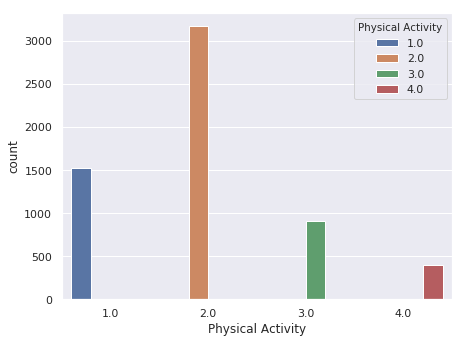

In [35]:
#group the data
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(7,5.27)})
# create a countplot
sns.countplot('Physical Activity',data=acute_liver_failure_data,hue = 'Physical Activity')

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/.local/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


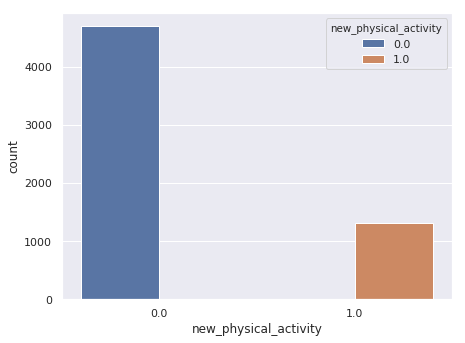

In [36]:
physical_activity = acute_liver_failure_data['Physical Activity']
new_physical_activity = []
for i in physical_activity:
    if math.isnan(i) == False:
        #new_physical_activity.append('low_activity')
        if i == 2:
            new_physical_activity.append(0)
        elif i == 3:
            new_physical_activity.append(1)
        elif i == 4:
            new_physical_activity.append(1)
        else:
            new_physical_activity.append(0)
    elif math.isnan(i) == True:
        new_physical_activity.append(0)

acute_liver_failure_data['new_physical_activity'] = new_physical_activity
acute_liver_failure_data.new_physical_activity = acute_liver_failure_data.new_physical_activity.astype('float64')
acute_liver_failure_data = acute_liver_failure_data.drop(columns=['Physical Activity'])

sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(7,5.27)})
# create a countplot
sns.countplot('new_physical_activity',data=acute_liver_failure_data,hue = 'new_physical_activity')

In [37]:
acute_liver_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 551 to 6550
Data columns (total 12 columns):
Age                       6000 non-null float64
Maximum Blood Pressure    6000 non-null float64
Minimum Blood Pressure    6000 non-null float64
PVD                       6000 non-null float64
Education                 6000 non-null float64
Income                    6000 non-null float64
PoorVision                6000 non-null float64
Diabetes                  6000 non-null float64
Hepatitis                 6000 non-null float64
Chronic Fatigue           6000 non-null float64
ALF                       6000 non-null float64
new_physical_activity     6000 non-null float64
dtypes: float64(12)
memory usage: 769.4 KB


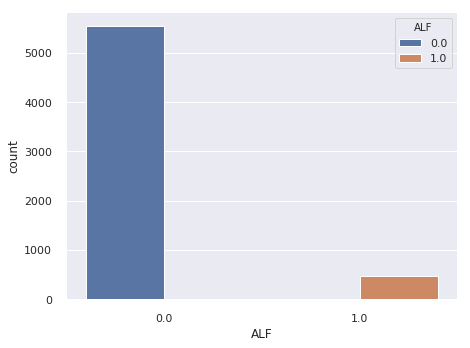

In [38]:
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(7,5.27)})
# create a countplot
sns.countplot('ALF',data=acute_liver_failure_data,hue = 'ALF')
# Remove the top and down margin
sns.despine(offset=5, trim=True)

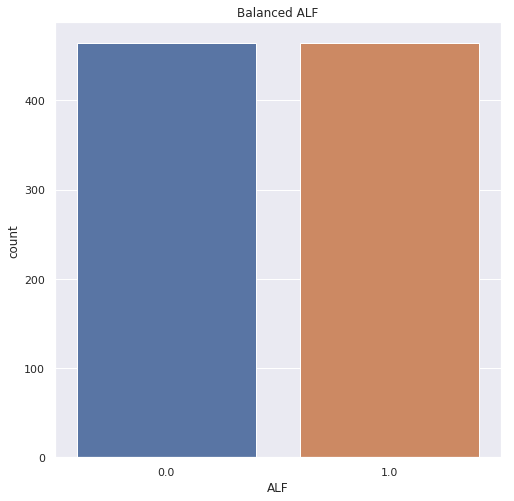

In [39]:
#Undersampling
# Shuffle the Dataset.
shuffled_df = acute_liver_failure_data.sample(frac=1,random_state=40)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['ALF'] == 1]

#Randomly select 464 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['ALF'] == 0].sample(n=464,random_state=40)

# Concatenate both dataframes again
undersampled = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('ALF', data=undersampled)
plt.title('Balanced ALF')
plt.show()

In [40]:
undersampled.shape

(928, 12)

In [41]:
undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 745 to 1819
Data columns (total 12 columns):
Age                       928 non-null float64
Maximum Blood Pressure    928 non-null float64
Minimum Blood Pressure    928 non-null float64
PVD                       928 non-null float64
Education                 928 non-null float64
Income                    928 non-null float64
PoorVision                928 non-null float64
Diabetes                  928 non-null float64
Hepatitis                 928 non-null float64
Chronic Fatigue           928 non-null float64
ALF                       928 non-null float64
new_physical_activity     928 non-null float64
dtypes: float64(12)
memory usage: 134.2 KB


In [42]:
acute_liver_failure_data['ALF'].value_counts()

0.0    5536
1.0     464
Name: ALF, dtype: int64

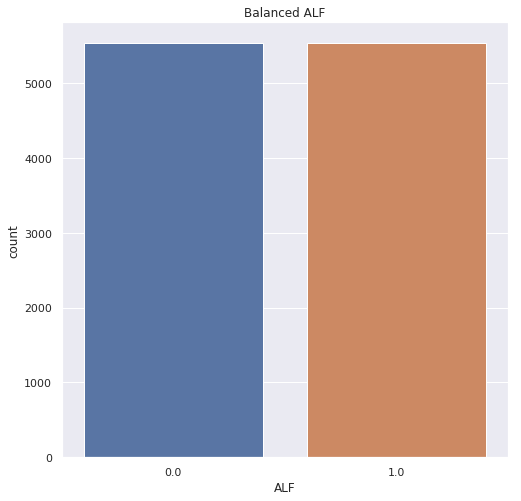

In [43]:
df_majority = acute_liver_failure_data[acute_liver_failure_data.ALF==0.0]
df_minority = acute_liver_failure_data[acute_liver_failure_data.ALF==1.0]

from sklearn.utils import resample

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5536,    # to match majority class
                                 random_state=464) # reproducible results
 
# Combine majority class with upsampled minority class
upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
upsampled.ALF.value_counts()

plt.figure(figsize=(8, 8))
sns.countplot('ALF', data=upsampled)
plt.title('Balanced ALF')
plt.show()

In [44]:
acute_liver_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 551 to 6550
Data columns (total 12 columns):
Age                       6000 non-null float64
Maximum Blood Pressure    6000 non-null float64
Minimum Blood Pressure    6000 non-null float64
PVD                       6000 non-null float64
Education                 6000 non-null float64
Income                    6000 non-null float64
PoorVision                6000 non-null float64
Diabetes                  6000 non-null float64
Hepatitis                 6000 non-null float64
Chronic Fatigue           6000 non-null float64
ALF                       6000 non-null float64
new_physical_activity     6000 non-null float64
dtypes: float64(12)
memory usage: 769.4 KB


In [45]:
acute_liver_failure_data = spark.createDataFrame(acute_liver_failure_data)

In [46]:
print(type(acute_liver_failure_data))

print(acute_liver_failure_data.columns)
acute_liver_failure_data.printSchema()

<class 'pyspark.sql.dataframe.DataFrame'>
['Age', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'PVD', 'Education', 'Income', 'PoorVision', 'Diabetes', 'Hepatitis', 'Chronic Fatigue', 'ALF', 'new_physical_activity']
root
 |-- Age: double (nullable = true)
 |-- Maximum Blood Pressure: double (nullable = true)
 |-- Minimum Blood Pressure: double (nullable = true)
 |-- PVD: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)
 |-- PoorVision: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- Hepatitis: double (nullable = true)
 |-- Chronic Fatigue: double (nullable = true)
 |-- ALF: double (nullable = true)
 |-- new_physical_activity: double (nullable = true)



In [47]:
# Visualise the training data format.
acute_liver_failure_data.show(5)

+----+----------------------+----------------------+---+---------+------+----------+--------+---------+---------------+---+---------------------+
| Age|Maximum Blood Pressure|Minimum Blood Pressure|PVD|Education|Income|PoorVision|Diabetes|Hepatitis|Chronic Fatigue|ALF|new_physical_activity|
+----+----------------------+----------------------+---+---------+------+----------+--------+---------+---------------+---+---------------------+
|65.0|                 135.0|                  71.0|0.0|      0.0|   1.0|       0.0|     0.0|      1.0|            0.0|0.0|                  1.0|
|36.0|                  96.0|                  52.0|0.0|      0.0|   1.0|       0.0|     0.0|      0.0|            0.0|0.0|                  1.0|
|66.0|                 115.0|                  57.0|0.0|      0.0|   0.0|       0.0|     1.0|      0.0|            0.0|0.0|                  0.0|
|54.0|                 110.0|                  57.0|0.0|      1.0|   0.0|       0.0|     0.0|      0.0|            0.0|0.0| 

In [48]:
from pyspark.ml.feature import VectorAssembler

In [49]:

assembler = VectorAssembler(inputCols=['Age', 'Maximum Blood Pressure', 
                     'Minimum Blood Pressure', 'PVD', 'Education', 'Income', 
                     'PoorVision', 'Diabetes', 'Hepatitis', 'Chronic Fatigue', 
                     'new_physical_activity'
], outputCol='features')

In [50]:
ALF_feature = assembler.transform(acute_liver_failure_data)
ALF_feature = ALF_feature.select(['features', 'ALF'])
ALF_feature = ALF_feature.selectExpr("features as features", "ALF as label")
ALF_feature.show(20)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(11,[0,1,2,5,8,10...|  0.0|
|(11,[0,1,2,5,10],...|  0.0|
|(11,[0,1,2,7],[66...|  0.0|
|(11,[0,1,2,4],[54...|  0.0|
|(11,[0,1,2],[63.0...|  0.0|
|(11,[0,1,2,4],[26...|  0.0|
|(11,[0,1,2,4,10],...|  0.0|
|(11,[0,1,2,4,7],[...|  0.0|
|(11,[0,1,2,4,5],[...|  0.0|
|(11,[0,1,2,7,8],[...|  0.0|
|(11,[0,1,2,4,5,10...|  0.0|
|(11,[0,1,2,5,10],...|  0.0|
|(11,[0,1,2,10],[6...|  0.0|
|(11,[0,1,2,4],[36...|  0.0|
|(11,[0,1,2],[60.0...|  0.0|
|(11,[0,1,2,4,10],...|  0.0|
|(11,[0,1,2],[47.0...|  0.0|
|(11,[0,1,2,5],[53...|  1.0|
|(11,[0,1,2,4,10],...|  0.0|
|(11,[0,1,2],[30.0...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [51]:
train, test = ALF_feature.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))



Training Dataset Count: 4196
Test Dataset Count: 1804


In [52]:
#1 Logistic Regression Model
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

NameError: name 'lrModel' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()


In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
lrModel = lr.fit(train)
predictions = lrModel.transform(test)
predictions.show(10)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

In [ ]:
#2 Decision Tree Classifier

from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.show(10)


In [ ]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + 
      str(evaluator.evaluate(predictions, 
        {evaluator.metricName: "areaUnderROC"})))

In [ ]:
#3 Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.show(10)






In [ ]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + 
      str(evaluator.evaluate(predictions, 
                             {evaluator.metricName: "areaUnderROC"})))